In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv('C://Users//sharv//Projects//DATA//gene_expression.csv')

In [7]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


<Axes: xlabel='Gene One', ylabel='Gene Two'>

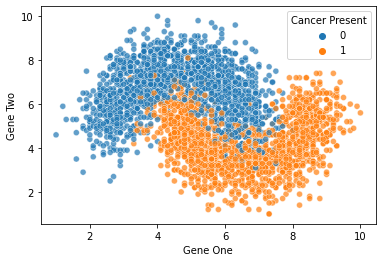

In [15]:
sns.scatterplot(data=df,x='Gene One',y='Gene Two',hue='Cancer Present',alpha = 0.7)

In [ ]:
# Lets see if data is divided in classes. if there is little overlapping we can use Knn

(4.0, 8.0)

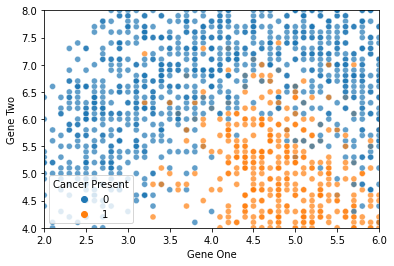

In [14]:
sns.scatterplot(data=df,x='Gene One',y='Gene Two',hue='Cancer Present',alpha = 0.7)
plt.xlim(2,6)
plt.ylim(4,8)

In [16]:
#EDA 

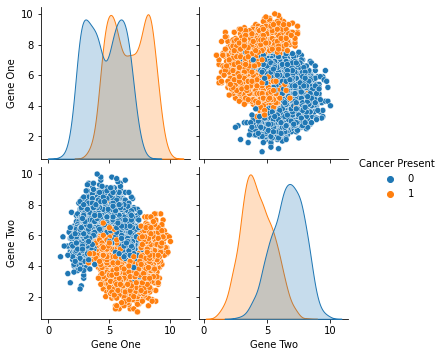

In [17]:
sns.pairplot(data=df,hue='Cancer Present')

In [18]:
from sklearn.model_selection import train_test_split

In [22]:
from sklearn.preprocessing import StandardScaler

In [24]:
X = df.drop('Cancer Present', axis = 1)
X

,Gene One,Gene Two
0,4.3,3.9
1,2.5,6.3
2,5.7,3.9
3,6.1,6.2
4,7.4,3.4
...,...,...
2995,5.0,6.5
2996,3.4,6.6
2997,2.7,6.5
2998,3.3,5.6


In [25]:
y = df['Cancer Present']
y

0       1
1       0
2       1
3       0
4       1
       ..
2995    1
2996    0
2997    0
2998    0
2999    0
Name: Cancer Present, Length: 3000, dtype: int64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [27]:
scaler = StandardScaler() #We dont scale y because its 0 and 1

In [30]:
scaled_X_train= scaler.fit_transform(X_train)

In [31]:
scaled_X_test = scaler.fit_transform(X_test)

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'}, callable or None, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighb

In [66]:
knn_model = KNeighborsClassifier(n_neighbors = 9) #We can increase the number of neighbors

In [67]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [68]:
y_pred = knn_model.predict(scaled_X_test)

In [43]:
from sklearn.metrics import confusion_matrix

In [69]:

confusion_matrix(y_test, y_pred)

array([[432,  30],
       [ 38, 490]], dtype=int64)

In [70]:
len(y_test)

990

In [56]:
from sklearn.metrics import classification_report, accuracy_score

In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       462
           1       0.94      0.93      0.94       528

    accuracy                           0.93       990
   macro avg       0.93      0.93      0.93       990
weighted avg       0.93      0.93      0.93       990



In [59]:
1 - accuracy_score(y_test, y_pred)

0.09999999999999998

In [ ]:
#We can increase the number of neighbors to improve the module by changing n_neighbors

In [60]:
#Elbow method
test_error_rate = [] #df to store error rate

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors = k)
    knn_model.fit(scaled_X_train,y_train)
    y_pred_test = knn_model.predict(scaled_X_test)
    
    test_error = 1 - accuracy_score(y_test, y_pred_test)
    test_error_rate.append(test_error)

In [61]:
test_error_rate

[0.09999999999999998,
 0.11212121212121207,
 0.07777777777777772,
 0.08787878787878789,
 0.07272727272727275,
 0.08383838383838382,
 0.0757575757575758,
 0.07171717171717173,
 0.06868686868686869,
 0.0696969696969697,
 0.0696969696969697,
 0.0696969696969697,
 0.06868686868686869,
 0.07272727272727275,
 0.07777777777777772,
 0.07878787878787874,
 0.07878787878787874,
 0.07474747474747478,
 0.07272727272727275,
 0.07373737373737377,
 0.07272727272727275,
 0.07171717171717173,
 0.07373737373737377,
 0.07373737373737377,
 0.07171717171717173,
 0.07070707070707072,
 0.0696969696969697,
 0.07070707070707072,
 0.06666666666666665]

Text(0.5, 0, 'K Neighbors')

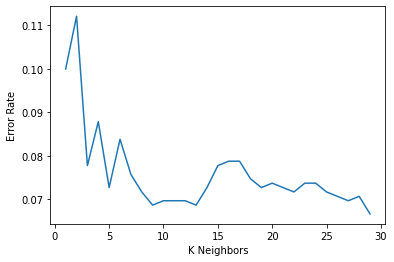

In [65]:
plt.plot(range(1,30), test_error_rate)
plt.ylabel('Error Rate')
plt.xlabel('K Neighbors')

In [ ]:
#K= 9  has lowest error rate so it should be the best but we need model to guess this and not us.

In [ ]:
#Grid Search CV will automate this process with pipeline

In [72]:
scaler = StandardScaler()

In [75]:
knn = KNeighborsClassifier()

In [76]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [77]:
operations = [('scaler',scaler),('knn',knn)]

In [78]:
from sklearn.pipeline import Pipeline

In [79]:
pipe = Pipeline(operations)

In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
k_values = list(range(1,20))

In [88]:
# param_grid = {'n_neighbors' : k_values}
param_grid = {'knn__n_neighbors':k_values}

In [89]:
full_CV_classifier = GridSearchCV(pipe,param_grid, cv = 5, scoring='accuracy') # 5 folds


In [90]:
full_CV_classifier.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [94]:
full_CV_classifier.best_estimator_.get_params() #Gives the best estimators

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=16))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=16),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 16,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [91]:
full_pred = full_CV_classifier.predict(X_test)

In [93]:
print(classification_report(y_test,full_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       462
           1       0.94      0.94      0.94       528

    accuracy                           0.94       990
   macro avg       0.94      0.94      0.94       990
weighted avg       0.94      0.94      0.94       990



In [95]:
# We should look at 16 neighbors wheter in goes to cancer or not